<a href="https://colab.research.google.com/github/eddy123457/RANSAC_JackknifeMethod/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Slope:  126.41285977884694 y-intercept:  11727.454260912491
11727.454260912535 126.41285977884688
[ 12069.11784806  12539.77556258  15014.30307595  17935.03744658
  19911.06375438 300509.18972094  20462.49558283  14085.42465973
  13496.53483279  17398.8143044   19575.78260023  19573.8197713
  25492.68517762  17158.63594123  25979.19789006  28729.16549721
  32610.25140905  24047.19500766  25131.74333133  60701.85397203]
new [12069.11784806 12539.77556258 13496.53483279 14085.42465973
 15014.30307595 17158.63594123 17398.8143044  17935.03744658
 19573.8197713  19575.78260023 19911.06375438 20462.49558283
 24047.19500766 25131.74333133 25492.68517762 25979.19789006
 28729.16549721 32610.25140905 60701.85397203]
[300509.18972094      0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              

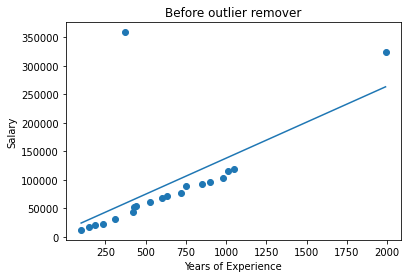

here 5
new y [ 12300  18150  20100  23500  31005  44359  52000  53853  61328  68000
  72300  77000  89379  93200  97150 102750 115358 119330 323989]
new x [ 100  150  185  235  310  420  430  440  530  600  634  718  750  850
  903  978 1010 1050 1990]


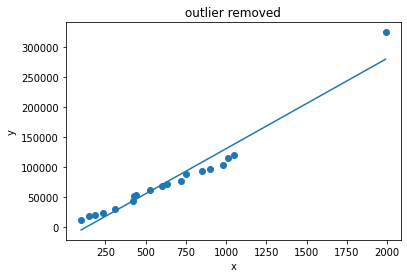

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

x = np.array([100, 150, 185, 235, 310, 370, 420,430,440,530,600,634,718,750,850,903,978,1010,1050,1990])
y = np.array([12300,  18150,  20100,  23500,  31005,359000,  44359,  52000,  53853,  61328,  68000,  72300,  77000,  89379,  93200,  97150,  102750,  115358,119330,  323989])
slope, intercept, r, p, std_error = stats.linregress(x,y)
print('Slope: ', slope, 'y-intercept: ', intercept)
distances = np.zeros(len(y))
y2 = np.zeros((len(y)))
x2 = np.zeros((len(x)))
w1 = ((np.mean(x*y)) - (np.mean(x) * np.mean(y))) / ((np.mean(x**2)) - (np.mean(x)**2))
w0 = np.mean(y) - (w1 * np.mean(x))
print(w0, w1)
Ymodel = w0 + w1*x

for t in range(len(y)):
    yline=(slope*x[t]) + intercept
    y2[t]+=yline
for t in range(len(y)):
    xline=(y[t]/slope)-(intercept/slope)
    x2[t]+=xline
  
for t in range(len(y)):
    distance = abs(math.sqrt(math.pow((x2[t] - x[t]), 2)+ math.pow((y2[t] - y[t]), 2)))
    distances[t]+=distance
print(distances)


for i in range(len(distances)):
        swap = i + np.argmin(distances[i:])
        (distances[i], distances[swap]) = (distances[swap], distances[i])
per=int((99/100)*len(distances))
new=np.zeros((per))
out=np.zeros((len(distances)))
temp=0
for i in range(len(distances)):
    if(i<per):
        new[i]+=distances[i]
    else:
        out[temp]+=distances[i]
        temp=temp+1

print('new',new)
print(out)
plt.title('Before outlier remover')
plt.scatter(x, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.plot(x,Ymodel)
plt.show()
holder=0

for t in range(len(y)):
    distance = abs(math.sqrt(math.pow((x2[t] - x[t]), 2)+ math.pow((y2[t] - y[t]), 2)))
    if(distance==out[0]):
        holder+=t
        
print('here',holder)   
y=np.delete(y,holder)
x=np.delete(x,holder)
print('new y',y)
print('new x',x)

w1 = ((np.mean(x*y)) - (np.mean(x) * np.mean(y))) / ((np.mean(x**2)) - (np.mean(x)**2))
w0 = np.mean(y) - (w1 * np.mean(x))

Ymodel2 = w0 + w1*x

plt.title('outlier removed')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,Ymodel2)
plt.show()

Estimated coefficients (true, linear regression, RANSAC):
[127.32881093] [111.65099994]


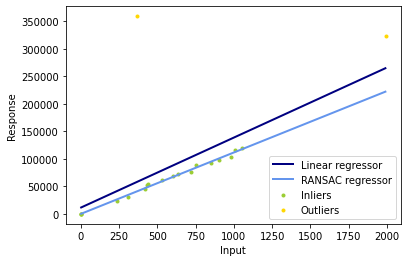

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets


n_samples = 20
n_outliers = 3


X = np.array([100, 150, 185, 235, 310, 370, 420,430,440,530,600,634,718,750,850,903,978,1010,1050,1990])
y = np.array([12300,  18150,  20100,  23500,  31005,359000,  44359,  52000,  53853,  61328,  68000,  72300,  77000,  89379,  93200,  97150,  102750,  115358,119330,  323989])
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

lr = linear_model.LinearRegression()
X=X.reshape(-1,1)
lr.fit(X, y)

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

print("Estimated coefficients (true, linear regression, RANSAC):")
print(lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()
